In [2]:
#This script creates performs clustering analysis usnig Uniform Manifold Approximation and 
# Projection (UMAP) as a dimension reduction technique and partitioning around medoids (PAM)
# to determine the optimal number of clusters.

In [ ]:
import umap
import umap.plot
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy

In [3]:
os.chdir("/Users/janahermans/Documents/")
clin_data = pd.read_table("ymrs_all_FINAL_SELECTED.txt", sep = "|")
colnames = list(clin_data.columns) #save column names which might come in handy later
print(clin_data)

       src_subject_id  interview_age sex  elevmood  incmotor  sexinter  \
10112           10112            684   F       0.0       0.0       0.0   
10201           10201            612   M       0.0       0.0       0.0   
10110           10110            648   F       0.0       0.0       0.0   
10207           10207            456   M       2.0       0.0       0.0   
10209           10209            600   F       2.5       3.0       0.0   
...               ...            ...  ..       ...       ...       ...   
10257           10257            612   F       0.0       0.0       0.0   
10258           10258            696   M       0.0       0.0       0.0   
10268           10268            564   F       0.0       0.0       2.5   
10271           10271            648   F       0.0       0.0       0.0   
10273           10273            372   M       1.0       3.5       2.0   

       sleepamt  irritamt  speech  langdisr  content  disrupt  appearnc  \
10112       0.0         0       0   

In [4]:
clin_data = numpy.array(clin_data)
diagnosis = numpy.array(clin_data[:,14])
print(diagnosis)
sex = numpy.array(clin_data[:,2])
print(sex)

['BDP' 'BDP' 'BD' 'BDP' 'BDP' 'BDP' 'BD' 'BD' 'BDP' 'BD' 'BDP' 'BDP' 'BD'
 'BD' 'BDP' 'BD' 'BDP' 'BDP' 'BDP' 'BD' 'BD' 'BD' 'BDP' 'BDP' 'BDP' 'BDP'
 'BDP' 'BDP' 'BD' 'BD' 'BDP' 'BD' 'BDP' 'BD' 'BDP' 'BDP' 'BD' 'BDP' 'BDP'
 'BD' 'BD' 'BDP' 'BD' 'BDP' 'BDP' 'BD' 'BD' 'BDP' 'BD' 'BD' 'BDP' 'BDP'
 'BD' 'BD' 'BD' 'BD' 'BD' 'BDP' 'BDP' 'BDP' 'BD' 'BDP' 'BDP' 'BD' 'BD'
 'BD' 'BDP' 'BDP' 'BDP' 'BDP' 'BDP' 'BD' 'BD' 'BD' 'BDP' 'BD' 'BDP' 'BD'
 'BDP' 'BDP' 'BDP' 'BD' 'BD' 'BD' 'BD' 'BDP' 'BDP' 'BD' 'BD' 'BDP' 'BDP'
 'BD' 'BDP' 'BDP' 'BDP' 'BDP' 'BDP' 'BDP' 'BDP' 'BDP' 'BD' 'BD' 'BD' 'BD']
['F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'F' 'M' 'M'
 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'F' 'F' 'F'
 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'F' 'F'
 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F'
 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'M'
 'F' 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 

In [5]:
for i in range(len(diagnosis)):
        if diagnosis[i,] == 'BD':
            diagnosis[i,] = 1
        elif diagnosis[i,] == 'BDP':
            diagnosis[i,] = 2
#print(diagnosis)

In [6]:
for i in range(len(sex)):
        if sex[i,] == 'F':
            sex[i,] = 1
        elif sex[i,] == 'M':
            sex[i,] = 2
#print(sex)

In [7]:
#create variable data with only the scores (e.g. excl. diagnosis, sex, age)
clin_data = numpy.array(clin_data)
data = numpy.delete(clin_data, [0,1,2,14], 1)
print(data)

[[0.0 0.0 0.0 ... 0 0.5 0.0]
 [0.0 0.0 0.0 ... 3 1.0 0.5]
 [0.0 0.0 0.0 ... 0 0.0 0.0]
 ...
 [0.0 0.0 2.5 ... 4 0.0 0.0]
 [0.0 0.0 0.0 ... 0 2.5 0.0]
 [1.0 3.5 2.0 ... 5 3.0 0.0]]


In [4562]:
#optional: select only a subsection of the clinical scores
#data = numpy.array(data)
#data = np.delete(data, [1,4], 1)
#print(data)

In [357]:
#perform UMAP
mapper = umap.UMAP(random_state=76).fit_transform(data)

In [359]:
#remove sub-10854
#mapper = numpy.delete(mapper, [90], 0)
#diagnosis = numpy.delete(diagnosis, [90], 0)
#sex = numpy.delete(sex, [90], 0)
#for CAS --> mapper = numpy.delete(mapper, [75], 0)

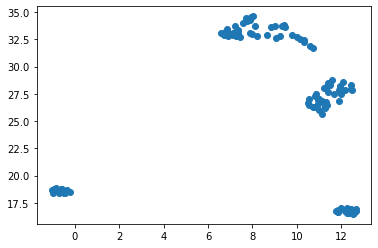

In [358]:
#plot scatterplot of data after UMAP
print(plt.scatter(mapper[:, 0], mapper[:, 1]))

In [340]:
#create variable X on which to perform partitioning around mediods (PAM)
X = numpy.asarray(mapper)

In [341]:
#perform PAM
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, method='pam').fit(X)

In [342]:
#set colours to cluster labels
unique_labels = set(kmedoids.labels_)
colors = [
    plt.cm.Spectral(each) for each in numpy.linspace(0, 1, len(unique_labels))
]

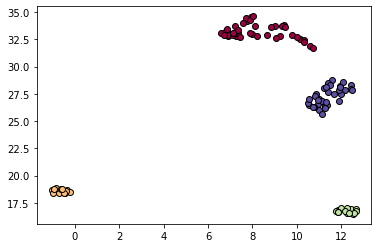

In [343]:
#plot the data using colours for the clusters
for k, col in zip(unique_labels, colors):

    class_member_mask = kmedoids.labels_ == k

    xy = X[class_member_mask]
    ax = plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
#plt.suptitle("Clustering based on YMRS scores using UMAP", fontsize=12)
#plt.title("Based on all scores", fontsize=8)
print(ax)

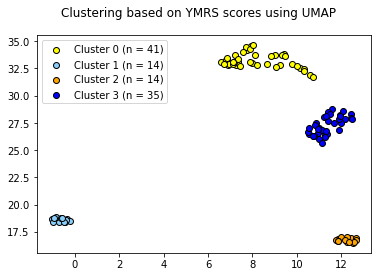

In [344]:
#plot sex distribution in the scatterplot using colour
Dist = pd.DataFrame(mapper)
Dist["Cluster"] = kmedoids.labels_
Dist = numpy.array(Dist)
#print(Dist) #optional: print to check if Dist
scatter_x = Dist[:,0]
scatter_y = Dist[:,1]
cdict = {0: 'yellow', 1: 'lightskyblue', 2: 'orange', 3: 'blue'}

fig, ax = plt.subplots()
for g in numpy.unique(Dist[:,2]):
    ix = numpy.where(Dist[:,2] == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, edgecolors='black')
plt.suptitle("Clustering based on YMRS scores using UMAP", fontsize=12)
#plt.title("Based on YMRS", fontsize=8)
L=ax.legend()
L.get_texts()[0].set_text('Cluster 0 (n = 41)')
L.get_texts()[1].set_text('Cluster 1 (n = 14)')
L.get_texts()[2].set_text('Cluster 2 (n = 14)')
L.get_texts()[3].set_text('Cluster 3 (n = 35)')
#plt.savefig("YMRS_cluster_plot_f.eps", dpi=1200)
plt.show()

In [345]:
print(kmedoids.labels_)

[0 3 0 1 2 1 3 2 0 0 3 2 3 3 3 0 2 3 3 2 3 2 2 3 1 1 1 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 1 0 3 3 3 3 3
 3 3 1 3 3 3 1 2 3 2 2 3 3 3 3 1 2 3 3 3 1 1 3 3 1 1 3 2 2 2]


In [556]:
print(kmedoids.labels_)

[0 3 0 1 2 1 3 2 0 0 3 2 3 3 3 0 2 3 3 2 3 2 2 3 1 1 1 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 1 0 3 3 3 3 3
 3 3 1 3 3 3 1 2 3 2 2 3 3 3 3 1 2 3 3 3 1 1 3 3 1 1 3 2 2 2]


In [346]:
#try out PAM using different numbers of clusters
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMedoids(n_clusters=num_clusters, method='pam').fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))

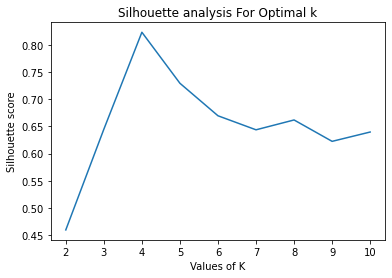

In [347]:
#plot the Silhouette scores of different k's
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [348]:
#calculate the exact Silhouette score for a specified k
kmeans = KMedoids(n_clusters=4, method='pam').fit(X)
cluster_labels = kmeans.labels_
print(silhouette_score(X, cluster_labels))

0.82350355


In [349]:
#count the number of entries in each cluster
from collections import Counter
Counter(kmedoids.labels_)
print(Counter(kmedoids.labels_))

Counter({0: 41, 3: 35, 1: 14, 2: 14})


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


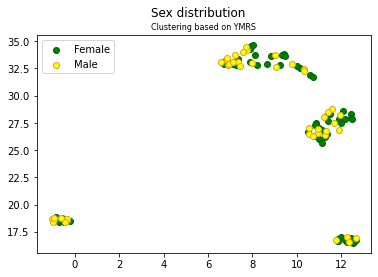

In [350]:
#plot sex distribution in the scatterplot using colour
Dist = pd.DataFrame(mapper)
Dist["Sex"] = sex
Dist = numpy.array(Dist)
#print(Dist) #optional: print to check if Dist
scatter_x = Dist[:,0]
scatter_y = Dist[:,1]
cdict = {1: 'green', 2: 'yellow'}
cdict2 = {1: 'darkgreen', 2: 'goldenrod'}

fig, ax = plt.subplots()
for g in numpy.unique(Dist[:,2]):
    ix = numpy.where(Dist[:,2] == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, edgecolors=cdict2[g])
plt.suptitle("Sex distribution", fontsize=12)
plt.title("Clustering based on YMRS", fontsize=8)
L=ax.legend()
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')
plt.savefig("YMRS_sex_dist_plot.eps", dpi=1200)
plt.show()

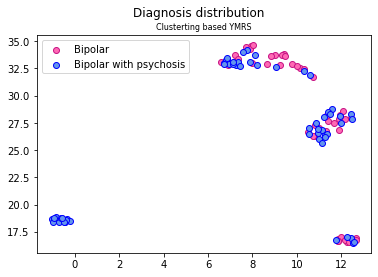

In [351]:
#plot diagnosis distribution in the scatterplot using colour
Dist = pd.DataFrame(mapper)
Dist["Diagnosis"] = diagnosis
Dist = numpy.array(Dist)
#print(Dist) #optional: print to check if Dist
scatter_x = Dist[:,0]
scatter_y = Dist[:,1]
cdict = {1: 'hotpink', 2: 'cornflowerblue'}
cdict2 = {1: 'mediumvioletred', 2: 'blue'}

fig, ax = plt.subplots()
for g in numpy.unique(Dist[:,2]):
    ix = numpy.where(Dist[:,2] == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, edgecolors=cdict2[g])
plt.suptitle("Diagnosis distribution", fontsize=12)
plt.title("Clusterting based YMRS", fontsize=8)
L=ax.legend()
L.get_texts()[0].set_text('Bipolar')
L.get_texts()[1].set_text('Bipolar with psychosis')
#plt.savefig("YMRS_diag_dist_plot.eps", dpi=1200)
plt.show()

In [352]:
#create dataframe with subject IDs, cluster labels, and clinical scores
labeled_ctq = numpy.array(clin_data)
labeled_ctq[:,1] = kmedoids.labels_
labeled_ctq = pd.DataFrame(labeled_ctq, columns=[colnames]) 
labeled_ctq = labeled_ctq.rename(columns = {'interview_age':'YMRS_cluster'})
#labeled_ctq.to_csv('new_labeled_ymrs_FINAL.txt', sep='|')
print(labeled_ctq)

    src_subject_id YMRS_cluster sex elevmood incmotor sexinter sleepamt  \
0            10112            0   F      0.0      0.0      0.0      0.0   
1            10201            3   M      0.0      0.0      0.0      1.5   
2            10110            0   F      0.0      0.0      0.0      0.0   
3            10207            1   M      2.0      0.0      0.0      0.0   
4            10209            2   F      2.5      3.0      0.0      2.5   
..             ...          ...  ..      ...      ...      ...      ...   
99           10257            1   F      0.0      0.0      0.0      2.0   
100          10258            3   M      0.0      0.0      0.0      2.5   
101          10268            2   F      0.0      0.0      2.5      0.0   
102          10271            2   F      0.0      0.0      0.0      2.5   
103          10273            2   M      1.0      3.5      2.0      1.5   

    irritamt speech langdisr content disrupt appearnc insight diagnosis  
0          0      0      

In [353]:
mapper_save = numpy.array(mapper)
mapper_save = pd.DataFrame(mapper_save)
print(mapper_save)
#mapper_save.to_csv('mapper_ymrs_f.txt', sep=',')

             0          1
0     6.696082  32.965454
1    10.551227  26.470423
2     7.913024  34.551067
3    -0.367238  18.622509
4    12.427439  16.941372
..         ...        ...
99   -0.567583  18.792448
100  11.330305  26.754276
101  11.871490  16.607809
102  11.830124  16.680161
103  12.344902  16.536623

[104 rows x 2 columns]


In [359]:
read_trial = pd.read_table("mapper_ymrs_f.txt", sep = ",", index_col = 0)
print(read_trial)

             0          1
0     6.696082  32.965454
1    10.551227  26.470423
2     7.913024  34.551067
3    -0.367238  18.622509
4    12.427439  16.941372
..         ...        ...
99   -0.567583  18.792448
100  11.330305  26.754276
101  11.871490  16.607810
102  11.830124  16.680160
103  12.344902  16.536623

[104 rows x 2 columns]


In [360]:
mapper = numpy.array(read_trial)